# 1.) Import the data from CCLE into a new Google Colab file

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
import sklearn as sk

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
import statsmodels.api as sm

In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/insurance.csv")

In [8]:
df.loc[df['sex']=='female', 'sex'] = 1

In [9]:
df.loc[df['sex']=='male', 'sex'] = 0

In [10]:
df.loc[df['smoker']=='yes', 'smoker'] = 1

In [11]:
df.loc[df['smoker']=='no', 'smoker'] = 0

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [15]:
df.loc[df['region']== 'southwest', 'region'] = 0
df.loc[df['region']== 'northwest', 'region'] = 1
df.loc[df['region']== 'southeast', 'region'] = 2
df.loc[df['region']== 'northeast', 'region'] = 3

# 2.) Split the data into 80/20, in/out sample

In [17]:
import numpy as np

In [18]:
# every row and every column except for the last one, needs to be in an array for sklearn
data = np.array(df.iloc[:, :-1])

In [19]:
target= np.array(df.iloc[:, -1]) # changed to -3

In [20]:
cut = int((len(data) * .8)//1)

In [21]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = data[cut:]


# 3.) Normalize the Data

In [23]:
from sklearn import preprocessing

In [24]:
scaler = preprocessing.StandardScaler().fit(in_data) 
# making a scaler object that is fit to our in sample data, allows us to scale any data with respect to the mean/sd of sample data


In [25]:
in_data_scale = scaler.transform(in_data)

In [26]:
# scaling our out of sample data based on the in sample data
out_data_scale = scaler.transform(out_data) 

# 4.) Get lambda from Lasso cross validation

In [ ]:
# use function LassoCV

In [ ]:
#.alpha

In [28]:
# have to figure this one out
from sklearn.linear_model import LassoCV

In [29]:
modCV = LassoCV().fit(in_data_scale, in_target) 

In [30]:
a = modCV.alpha_

In [31]:
a

176.27926602952408

In [ ]:
#region shud be 4 binary variables, so duplicate columns

# 5.) Run a lambda regression with that Lambda

In [47]:
# use Lasso function/ the alpha above
from sklearn.linear_model import Lasso


In [34]:
mod1 = sk.linear_model.Lasso(alpha = a).fit(in_data_scale, in_target)

In [40]:
coef = mod1.coef_

# 6.) Visualize the coefficients 

Text(0, 0.5, 'Region')

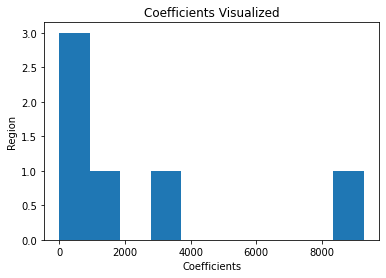

In [45]:
plt.hist(coef)
plt.title('Coefficients Visualized')
plt.xlabel('Coefficients')
plt.ylabel('Region')


# 0 is southwest
# 1 is northwest
# 2 is southeast
#3 is northeast


# 7.) Interpret the coefficients

In the plot above, region was broken up as such: 0 is southwest, 1 is northwest, 2 is southeast, 3 is northeast. Coefficients with a score less than 1000 were associated with the northeast. Coefficients with scores between 1000 and 2000, between 3000 and 4000, and between 8000 and 9000 were associated with the northwest.

# 8.) Compare in and out of sample MSE’s

In [38]:
mod1.predict(np.array(in_data_scale))

array([25165.72081561,  4111.67312725,  6985.78958892, ...,
       11841.48932999, 11618.73145994, 12554.34362287])

In [39]:
mod1.predict(np.array(out_data_scale))

array([32986.21227301, 14520.02948007,  3662.30461561, 12114.62425727,
        9888.77478496,  6372.648214  , 10528.91591359,  2421.05429294,
       28839.7208477 , 15927.63497427,   863.27520379,  5700.16014472,
        4864.98739871,  6632.40560948, 14286.22429435, 28829.13566582,
       11789.53587507, 12743.01953297, 16744.39589255,  9545.28697148,
       34923.08968067, 12042.68110969,  5341.72764788, 26808.48015779,
       12686.61071212,  4452.71331449, 36314.49634992,  4809.70881489,
       11602.38640984,  5926.09691852, 27119.07929919, 11624.75913734,
        8391.26716732, 14489.97823528,  7077.00973455, 12057.37637924,
       10265.67116259, 10021.72039712,  4688.90230071,  7488.6928644 ,
       12825.64830864, 34230.04490394, 33016.22956642,  4853.64537152,
        2470.81460765, 13032.22051585,  9995.63703699, 29181.66608218,
       31595.7989852 ,  3468.91602343, 27201.58043261, 12713.11374767,
       37372.64615687,  6106.52567756, 31322.22579959, 12329.75551131,
      